# Importing Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'numpy'

# Importing dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Housing.csv')

In [ ]:
df.shape

(545, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

Text(0, 0.5, 'Price')

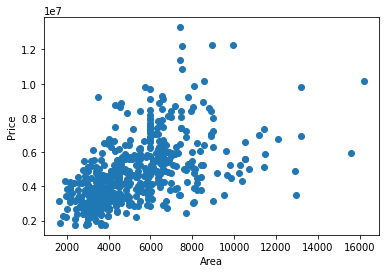

In [ ]:
plt.scatter(df.area, df.price)
plt.xlabel('Area')
plt.ylabel('Price')

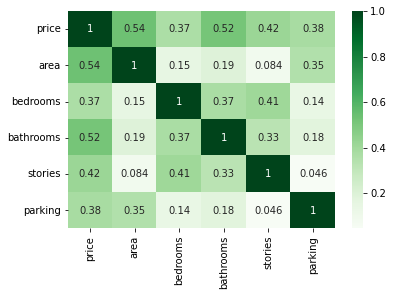

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='Greens')

In [ ]:
model = LinearRegression()

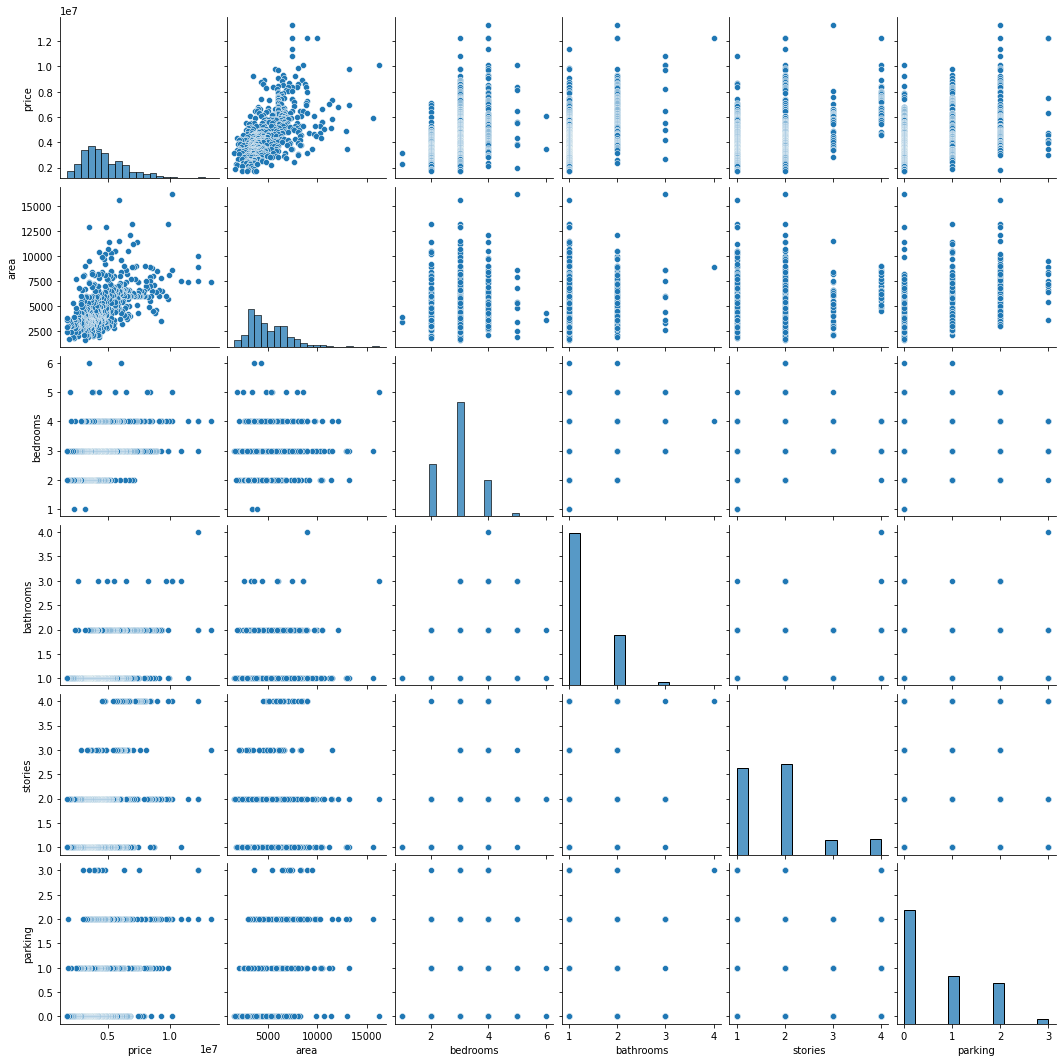

In [ ]:
sns.pairplot(df)

In [ ]:
df = df.replace({'mainroad': {'yes':1 ,'no':0}})
df = df.replace({'guestroom': {'yes':1 ,'no':0}})
df = df.replace({'basement': {'yes':1 ,'no':0}})
df = df.replace({'hotwaterheating': {'yes':1 ,'no':0}})
df = df.replace({'airconditioning': {'yes':1 ,'no':0}})
df = df.replace({'prefarea': {'yes':1 ,'no':0}})
df = df.replace({'furnishingstatus': {'furnished':1 ,'semi-furnished':1,'unfurnished':0}})

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


In [102]:
X = df[['area']]

y = df['price']

In [103]:
X.ndim

2

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [105]:
model.fit(X_train, y_train)

LinearRegression()

In [106]:
model.intercept_

2396236.7834321763

In [107]:
model.coef_

array([468.58959373])

In [113]:
468.58959373*8960+2396236.7834321763

6594799.543252977

In [108]:
y_pred = model.predict(X_test)

In [109]:
r2_score(y_test, y_pred)

0.24241572546418422

In [111]:
model.predict([[8960]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([6594799.5432198])